# 1

**Markov Chain**: A sequence of random variables $(X_0, X_1, \ldots)$ with state space $\Omega$ and transition matrix $P$ if for all $x, y \in \Omega$, all $t \geq 1$, and all events $H_{t-1} = \cap_{s=0}^{t-1} \{X_s = x_s\}$ satisfying $\mathbf{P}(H_{t-1} \cap \{X_t = x\}) > 0$, we have 

$$\mathbf{P}\{X_t = y \;|\; H_{t-1}\cap \{X_t = x\}\} = \mathbf{P}\{X_{t+1}=y \;|\; X_t=x\} = P(x, y)$$


## Example 1: Frog

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

def frog(p, q, T):
    """
    Plot the probabilities of being on the east or west lilipad at each time t.
    
    """
    P = np.array([[1-p, p], 
                  [q,   1-q]])

    mu_0 = np.array([1, 0])
    
    # Plotting the probabilities of being on the East lilipad for different values of p and q

    ts = range(0, T)
    ys = []
    for t in ts:
        P_t = np.linalg.matrix_power(P, t)
        y   = mu_0.dot(P_t)
        ys.append(y)
        
    plt.plot(ys)
    plt.xticks(range(0, T, T//5))
    plt.legend(["East lilipad probability", "West lilipad probability"])
    plt.show()
    
    print("The probability of staying on the east lilipad should converge to", q, "/(", p, "+", q, ") = ", q / (p+q))

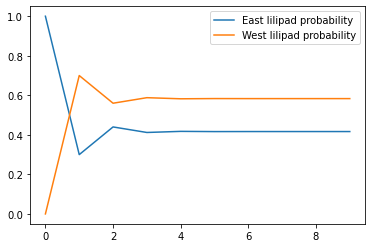

The probability of staying on the east lilipad should converge to 0.5 /( 0.7 + 0.5 ) =  0.4166666666666667


In [54]:
frog(0.7, 0.5, 10)


## Example 2: Random walk on the $n$-cycle

$\Omega = \mathbb{Z}_n = \{0,1,\ldots, n-1\}$. In this example we consider the following transition matrix:

$$P(j, k) = \begin{cases}1/2 &\text{if } k \equiv j + 1 & (\text{mod } n), \\ 1/2 &\text{if } k \equiv j - 1 & (\text{mod } n),\\ 0 & \text{otherwise} \end{cases}$$

For example, for $\mathbb{Z}_3$

$$\begin{bmatrix} 0 & 1/2 & 1/2 \\ 1/2 & 0 & 1/2 \\ 1/2 & 1/2 & 0 \end{bmatrix}$$

and for $\mathbb{Z}_6$

$$\begin{bmatrix} 0 & 1/2 & 0 & 0 & 0 & 1/2 \\ 1/2 & 0 & 1/2 & 0 & 0 & 0 \\ 0 & 1/2 & 0 & 1/2 & 0 & 0 \\ 0 & 0 & 1/2 & 0 & 1/2 & 0 \\ 0 & 0 & 0 & 1/2 & 0 & 1/2 \\ 1/2 & 0 & 0 & 0 & 1/2 & 0\end{bmatrix}$$


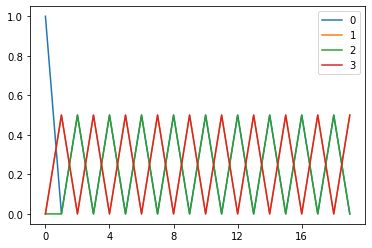

In [68]:
def ncycle_random_walk(n, T):
    """Simulates the n-cycle random walk with start position 0"""
    
    # Prepare transition matrix
    P = []
    for j in range(n):
        row = []
        for k in range(n):
            if (j + 1) % n == k:
                row.append(1/2)
            elif (j - 1) % n == k:
                row.append(1/2)
            else:
                row.append(0)
        P.append(row)
        
    # Prepare start state
    mu_0 = np.zeros([1, n])
    mu_0[0][0] = 1
    
    
    # Plotting the probabilities of being on the East lilipad for different values of p and q

    ts = range(0, T)
    ys = []
    for t in ts:
        P_t = np.linalg.matrix_power(P, t)
        y   = mu_0.dot(P_t)
        ys.append(y[0][:])
        
    plt.plot(ys)
    plt.xticks(range(0, T, T//5))
    plt.legend(["0", "1", "2", "3", "4", "5"])
    plt.show()


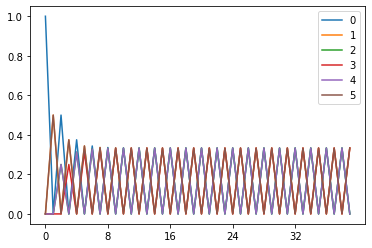

In [73]:
# Even case

ncycle_random_walk(6, 40)

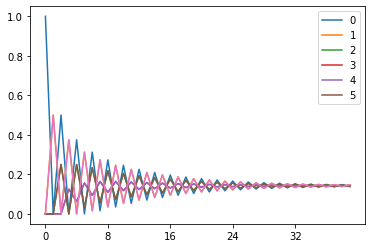

In [72]:
# Odd case 

ncycle_random_walk(7, 40)

The $n$-cycle random walk is periodic for even $n$, but aperiodic and thus converges for odd $n$. 

## Example 3: Lazy Random Walk

In [75]:
def lazy_ncycle_random_walk(n, T):
    """Simulates the n-cycle random walk with start position 0"""
    
    # Prepare transition matrix
    P = []
    for j in range(n):
        row = []
        for k in range(n):
            if (j + 1) % n == k:
                row.append(1/4)
            elif (j - 1) % n == k:
                row.append(1/4)
            elif j % n == k:
                row.append(1/2)
            else:
                row.append(0)
        P.append(row)
        
    # Prepare start state
    mu_0 = np.zeros([1, n])
    mu_0[0][0] = 1
    
    
    # Plotting the probabilities of being on the East lilipad for different values of p and q

    ts = range(0, T)
    ys = []
    for t in ts:
        P_t = np.linalg.matrix_power(P, t)
        y   = mu_0.dot(P_t)
        ys.append(y[0][:])
        
    plt.plot(ys)
    plt.xticks(range(0, T, T//5))
    plt.legend(["0", "1", "2", "3", "4", "5"])
    plt.show()


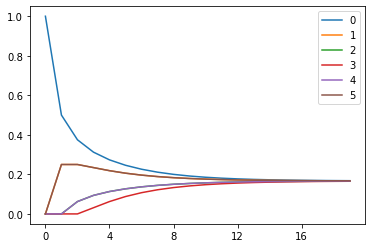

In [76]:
lazy_ncycle_random_walk(6, 20)

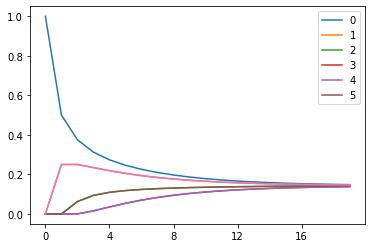

In [77]:
lazy_ncycle_random_walk(7, 20)